### Imports
-----

In [1]:
from N_body_billiards import *

from numpy import cos, sin, sign, infty, pi, sqrt, mean
from copy import deepcopy

from numpy.random import rand

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 75

### Streamline
-------

In [2]:
def sample_polygon(points, lines, N_samples = 1):
    """
    Sample from polygon with accept/reject method using a `bounding' rectangle
    """
    # reformat coordinates to list of x and y coordinates
    x_points, y_points = zip(*points)
    
    # min and max of x values
    x_low, x_high = min(x_points), max(x_points)

    # min and max of y values
    y_low, y_high = min(y_points), max(y_points)

    # list of samples
    samples = []

    N_hits = 0
    intersections = 0
    line = [0, 1]
    while N_hits < N_samples:
        while intersections % 2 == 0:
            # new sample
            x_sample = rand()*(x_high-x_low) + x_low
            y_sample = rand()*(y_high-y_low) + y_low

            # calc number of intersections
            for wall in lines:
                # determine the collision of two vectors
                det = -wall[0][0]
                if det == 0:
                    continue

                vec = [x_sample-wall[1][0], y_sample-wall[1][1]]

                result = [1/det*(-vec[0]), 1/det*(-wall[0][1]*vec[0] + wall[0][0]*vec[1])]

                if result[0] <= 1 and result[0] > 0 and result[1] > 0:
                    
                    intersections += 1
                      
        # add sample            
        samples.append((x_sample, y_sample))
        # increment number of valid samples found
        N_hits += 1

        # reset hit counter
        intersections = 0

    #if N_samples == 1:
    #    return x_sample, y_sample,
    
    return samples

def Run_Simulations(domain_points, N_particles, N_simulations):
    lines = construct_boundary(domain_points)
    sample_points = sample_polygon(domain_points, lines,  N_particles*N_simulations)

    plot_data = [[] for _ in range(N_particles)]

    for k in range(N_simulations):
        start_positions = sample_points[k:k+N_particles]
        start_angles = [rand()*2*pi for _ in range(N_particles)]

        sim_data = simulate(domain_points, N_particles, start_positions, start_angles, time_limit=10)
        
        for i in range(N_particles):
            plot_data[i].append(sim_data[i][-1])
    return plot_data

def Run_Single(domain_points, N_particles):
    lines = construct_boundary(domain_points)
    start_positions = sample_polygon(domain_points, lines, N_particles)
    start_angles = [rand()*6.28 for _ in range(N_particles)]
    

    sim_data = simulate(domain_points, N_particles, start_positions, start_angles, time_limit=10)

    line_plotter([*domain_points, domain_points[0]], 'k-', new=True)
    if N_particles == 1:
        plt.title(f"{N_particles} particle", fontsize=17)
    else:
        plt.title(f"{N_particles} particles", fontsize=17)

    linestyles = ['b--', 'r--', 'g--', 'm--', 'c--', 'k--','y--', 'b:','g:', 'r:', 'm:', 'c:', 'k:', 'y:']

    for ni in range(N_particles):
        line_plotter(sim_data[ni], linestyles[ni])

### Tests
-----

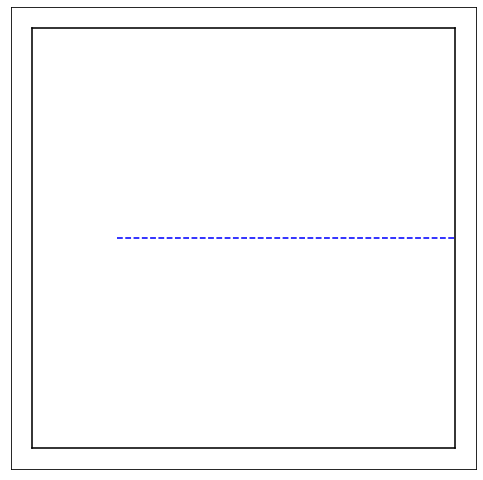

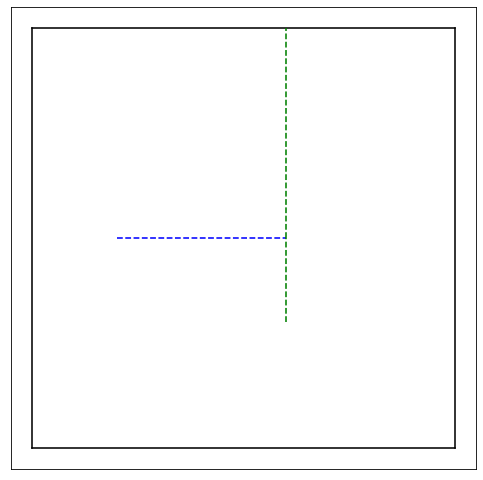

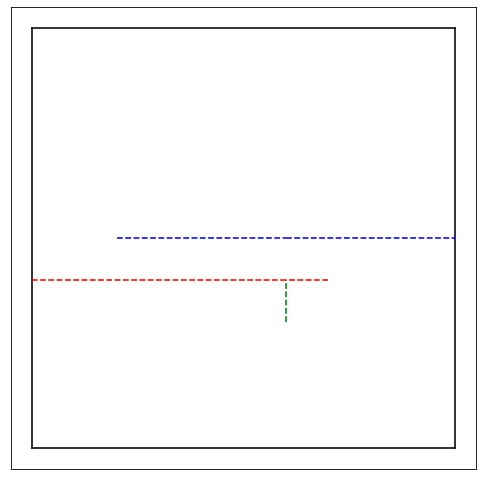

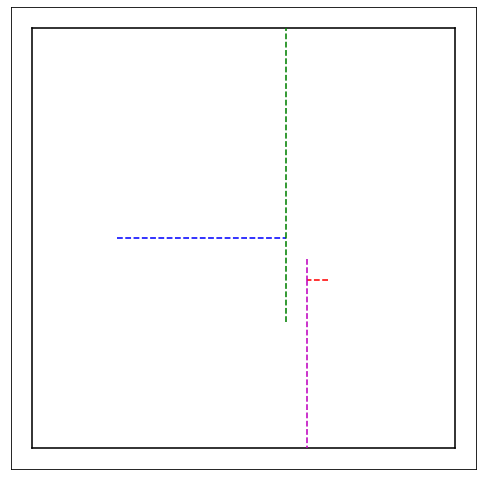

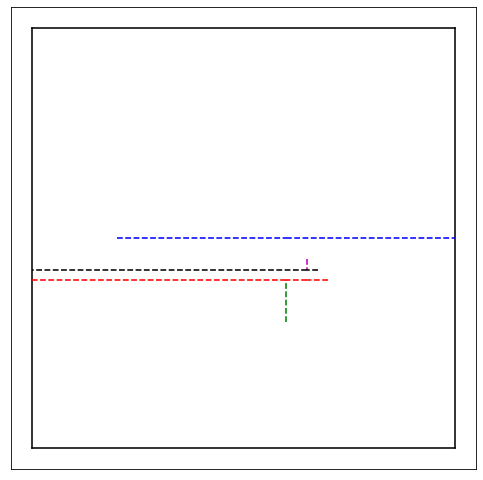

In [5]:
for N in range(1,6):

    #N = 5
    points = [[0,0], [0,1], [1,1], [1,0]]

    start_positions = [[rand(), rand()] for _ in range(N)]
    start_positions = [[0.2, 0.5], [0.6, 0.3], [0.7, 0.4], [0.65, 0.449], [0.675, 0.423]]

    start_angles = [rand()*6.28 for _ in range(N)]
    start_angles = [0, pi/2, pi, 3*pi/2, pi]

    sim_data = simulate(points, N, start_positions, start_angles, time_limit=10)

    line_plotter([*points, points[0]], 'k-', new=True)

    line_plotter(sim_data[0], 'b--')
    line_plotter(sim_data[1], 'g--')
    line_plotter(sim_data[2], 'r--')
    line_plotter(sim_data[3], 'm--')
    line_plotter(sim_data[4], 'k--')
    #line_plotter(sim_data[5], 'c--')

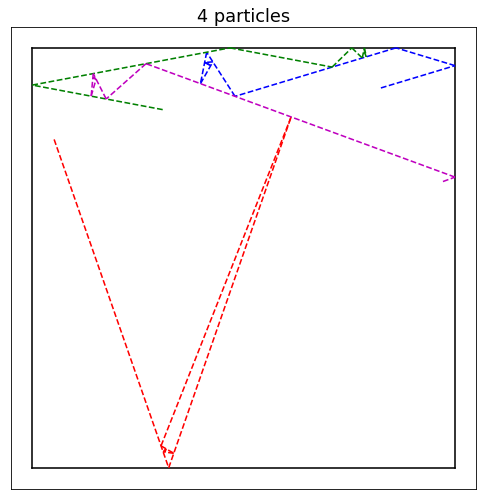

In [8]:
N = 4
#points = [[0,0], [0.5,sqrt(3)/2], [1,0]]
points = [[0,0], [0,1], [1,1], [1,0]]

Run_Single(points, N)

In [128]:
points = [[0,0], [0,1], [1,1], [1,0]]
N_particles = 2
N_simulations = 1000

sim_data = Run_Simulations(points, N_particles, N_simulations)

### TEST
--------

In [25]:
domain_points = [[0,0], [0,1], [1,1], [1,0]]
lines = construct_boundary(domain_points)

dists = []

for M in range(10**4):
    sample_points = sample_polygon(domain_points, lines,  128)
    for n, p0 in enumerate(sample_points):
        c_dists = []
        for k, p1 in enumerate(sample_points):
            c_dists.append(sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2))
            
        c_dists.sort()
        dists.append(mean(c_dists[1:5]))

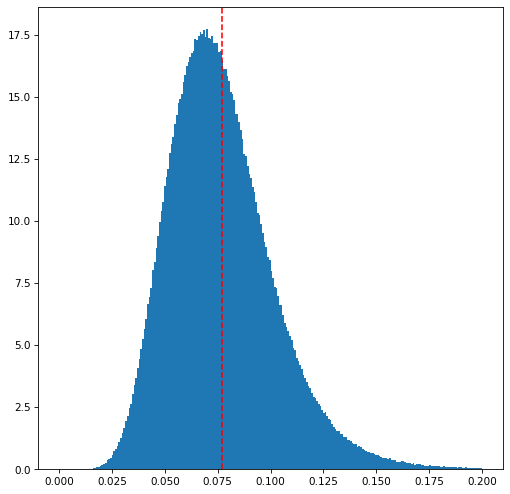

In [27]:
plt.figure(figsize=(8,8))
plt.hist(dists, bins=250, range=(0,0.2), density=True);
plt.axvline(mean(dists), color='red', ls='--');